# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Restart the kernel and run the whole notebook again before you submit. 
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed.

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

## <div class="theme">  <b>Predicting Taxi Pickups in NYC</b> </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `nyc_taxi.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

### <div class="exercise"> <b> Question 1  [20 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.

**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes to demonstrate how the number of taxi pickups is dependent on the time of the day.  Be sure to title your plot.

**1.3**. In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result. 

**1.4**. You should see a *hole* in the scatter plot when `TimeMin` is 500-550 minutes and `PickupCount` is roughly 20-30 pickups.  Briefly surmise why this may be the case.  This will not be graded harshly, we just want you to think and communicate about the cause.


### Answers

**1.1 Use pandas to load the dataset from the csv file ...**

In [3]:
# read the file
# your code here
df = pd.read_csv('data/nyc_taxi.csv')

In [4]:
# split the data
# your code here
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data.head()

,TimeMin,PickupCount
1194,404.0,5.0
911,131.0,17.0
422,85.0,13.0
670,539.0,36.0
931,1266.0,46.0


**1.2 Generate a scatter plot of the training data points**


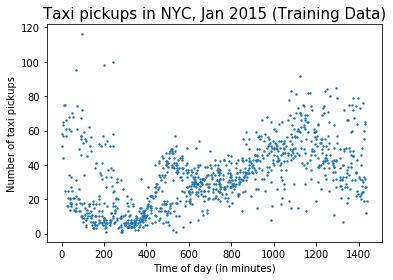

In [5]:
# Your code here
x_train = np.array(train_data.iloc[:,0])
y_train = np.array(train_data.iloc[:,1])
x_test = np.array(test_data.iloc[:,0])
y_test = np.array(test_data.iloc[:,1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Time of day (in minutes)', fontsize = 10)
ax.set_ylabel('Number of taxi pickups', fontsize = 10)
ax.set_title('Taxi pickups in NYC, Jan 2015 (Training Data)', fontsize = 15)

ax.scatter(x_train, y_train, s= 2)

**1.3 In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result.**

There are several high volume taxi pickups with a general negative slope (i.e. declining in number) between midnight and 5 AM (though overall, number of low-volume taxi pickups are larger in the early morning). 
Taxi pick-ups then increase as the day continues (positive slope), from morning until around 6:30 PM. 

Taxi pickups are likely high before 5 AM because public transit comes less frequently in the late evenings, and on weekened/holiday evenings, people may be taking taxis with much more frequency late at night--while on most normal late evenings, they will not be taking taxis frequently.

Taxi pickups likely hit a local minimum at 5 AM because most people are asleep and thus not ordering taxis. Taxi pickups likely increase throughout the daytime, particularly after 3 PM, because that is when people start to get off work, and taxi pickups slow down after 6:30 PM because people are mostly off from work by that time. 



**1.4 You should see a *hole* in the scatter plot when `TimeMin` is 500-550 minutes...**

At 500-550 minutes (8:20 AM - 9:10 AM), there is a hole for around 20-30 pickups. 
This may be because people generally commute to work from 8 to 9 AM. This means, on weekdays there are high-volume taxi pickups, while on weekends and holdays there are low-volume taxi pickups (less peope going to work, so less demand). This means there is a lack of medium-volume pick-ups during the hours of 8 and 9 AM. 

<hr>

### <div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 7 x 2 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ plots on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?
6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).

### Answers

**2.1 Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary...** 

In [6]:
# your code here
X_train = x_train.reshape(x_train.shape[0], 1)
X_test = x_test.reshape(x_test.shape[0], 1)

k_lst = [1,10,75,250,500,750,1000]

KNNmodels = {}
for k in k_lst:
    KNNmodels.update({k : KNeighborsRegressor(n_neighbors=k)})
    KNNmodels[k].fit(X_train, y_train)
    
KNNmodels
    

{1: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
 10: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'),
 75: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=75, p=2,
                     weights='uniform'),
 250: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=250, p=2,
                     weights='uniform'),
 500: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=500, p=2,
                     weights='uniform'),
 750: KNeighborsRegressor(algorit

**2.2  For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set...**

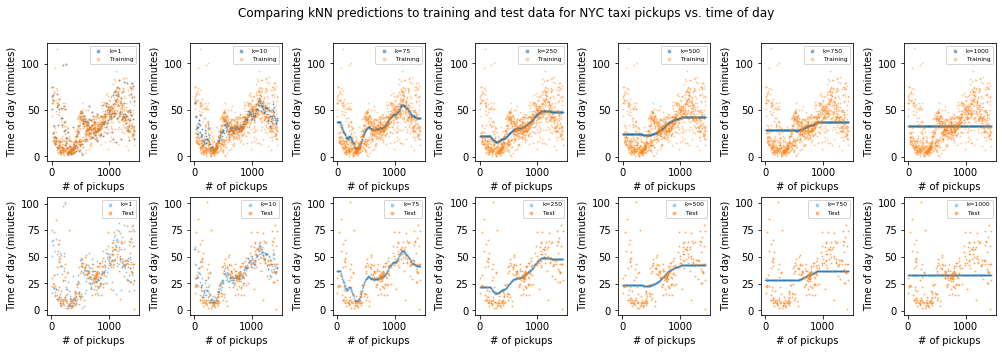

In [24]:
# your code here 
fig, ax = plt.subplots(2, 7, figsize = (17,5))

plt.subplots_adjust(wspace = 0.55, hspace = 0.3)
plt.suptitle('Comparing kNN predictions to training and test data for NYC taxi pickups vs. time of day')

x_grid = np.linspace(np.min(X_train), np.max(X_train), 240)

# Plot
count = 0
for k, reg_obj in KNNmodels.items():
    predictions = reg_obj.predict(x_grid.reshape(-1,1)) 
    ax[0,count].scatter(x_grid, predictions, label="k={}".format(k), s=1, alpha=0.5)
    ax[0, count].scatter(X_train, y_train, label ="Training", s=1, alpha=0.3)
    ax[0,count].set_xlabel('# of pickups')
    ax[0,count].set_ylabel('Time of day (minutes)')
    
    ax[1,count].scatter(x_grid, predictions, label="k={}".format(k), s=1, alpha=0.3)
    ax[1, count].scatter(x_test, y_test, label ="Test", s=1, alpha=0.5)
    ax[1,count].set_xlabel('# of pickups')
    ax[1,count].set_ylabel('Time of day (minutes)')
    
#https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend   
    legend1 = ax[0, count].legend(prop={'size': 6})
    for handle in legend1.legendHandles:
        handle.set_sizes([8.0])
    legend2 = ax[1, count].legend(prop={'size': 6})
    for handle in legend2.legendHandles:
        handle.set_sizes([8.0])
    count+=1


**2.3 Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).**


In [8]:
# your code here
results_lst = []
for k, reg_obj in KNNmodels.items():
    R2_dict = {}
    score_train = reg_obj.score(X_train, y_train) 
    score_test = reg_obj.score(X_test, y_test)
    R2_dict.update ({'k': k, 'Training R2' : score_train, 'Test R2' : score_test})
    results_lst.append(R2_dict)

df_results = pd.DataFrame(results_lst).head(n=7)

df_results.head()

,Test R2,Training R2,k
0,-0.418932,0.712336,1
1,0.272068,0.509825,10
2,0.390310,0.445392,75
3,0.340341,0.355314,250
4,0.270321,0.290327,500


**2.4 Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.**  

Text(0.5, 1.0, 'Comparing $R^{2}$ for Training and Test Data for Values of $k$')

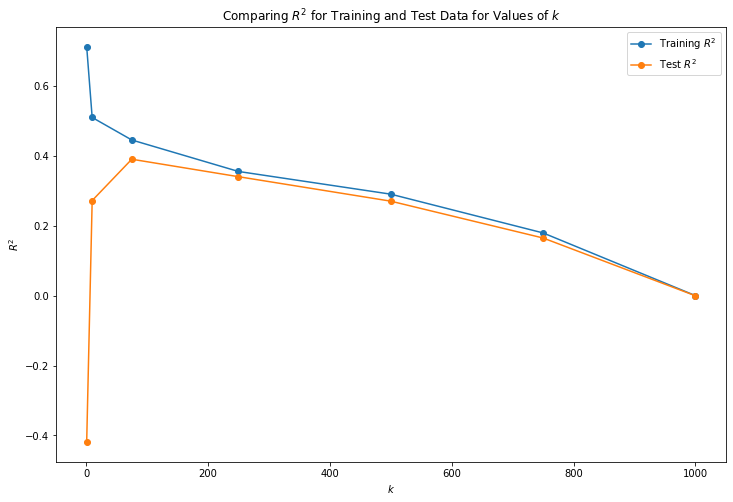

In [9]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(df_results['k'], df_results['Training R2'],'o-', label = r"Training $R^{2}$")
ax.plot(df_results['k'], df_results['Test R2'],'o-', label = r"Test $R^{2}$")
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.legend()
plt.title(r'Comparing $R^{2}$ for Training and Test Data for Values of $k$')

**2.5 Discuss the results:**

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  

*Answer:* A k-NN regression model that uses $k = n$ is simply a function where the predicted value is equal to the mean of the training set, $\bar{x}$, for all values of x. This visually appears as a horizontal line on a graph comparing time of day (x) to pickups (y), and in general is not a great fit to the data.

2. What does an $R^2$ score of $0$ mean?  

*Answer:* It means that the model's fitness is as good as the mean value of the data set. 

3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?

*Answer:* 
A negative $R^2$ means that the model is worse than the average. In other words, a model that predicts all values of y as equal to $\bar{x}$ is a better fit to the data than our actual model.

We do observe a negative $R^2$ value for our model that uses $k = 1$, when using the test data set. 

4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  

*Answer:* Yes, they exhibit different trends that appear to converge as k increases. The training set has a high $R^2$ value at low k values (k = 1, k = 10) because the k-Nearest Neighbors model is based on the training data set values. 

In contrast, the test set exhibits very low (in fact, negative) values of $R^2$ at low k values.

But as k increases, both the training set and test set converge to 0, because as k approaches n, the kNN model becomes closer and closer to $\hat{y} = \bar{x}$ (i.e. predicted y equals to mean).

5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?

*Answer:* The best value of k is arguably near $k = 75$. I chose this value by selecting the k value with the highest $R^2$ value for the test set.

The training set $R^2$ is higher than the test set, (0.445 vs. 0.39), which makes sense since the kNN model was created based on the training set. Still, the $R^2$'s appear to be relatively similar. 

6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).** ****

*Answer:* Lookin gat the plots in 2.2, we can see that the plot at k=75 is at a happy medium: it averages enough nearest neighbors to show a clearly visible relationship between time of day and pickups, while also not have too high a k value such that we lose details on key local minima and maxima in the visualization.

In other words, it  predicts the general shape of the relationship well without losing too many details. 

<hr>

### <div class="exercise"> <b> Question 3 [25 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create an `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Create a plot just like you did in 2.2 (but with fewer subplots): plot both the observed values and the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the estimates for the slope and intercept for the fitted linear model.  

**3.5**. Report the $95\%$ confidence intervals (CIs) for the slope and intercept.  

**3.6**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 
4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  
5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?


### Answers

**3.1 Again choose `TimeMin` as your predictor and `PickupCount` as your response variable...**

In [45]:
# your code here
X_train2 = sm.add_constant(x_train)
X_test2 = sm.add_constant(x_test)

OLSModel = sm.OLS(y_train, X_train2)
ols_res = OLSModel.fit()

predict_train = ols_res.predict(X_train2)
predict_test = ols_res.predict(X_test2)

**3.2 Create a plot just like you did in 2.2 (but with fewer subplots)...** 

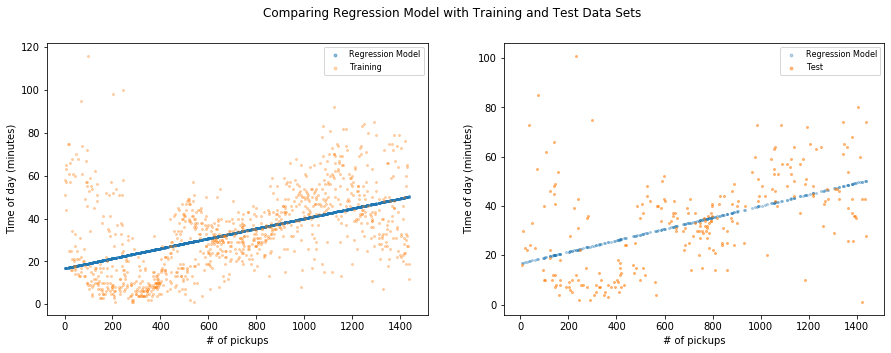

In [46]:
# your code here
fig, ax = plt.subplots(1, 2, figsize = (15,5))

plt.subplots_adjust(wspace = 0.2)
plt.suptitle('Comparing Regression Model with Training and Test Data Sets')

x_grid = np.linspace(np.min(X_train), np.max(X_train), 240)

# Plot
ax[0].scatter(X_train, predict_train, label="Regression Model".format(k), s=4, alpha=0.5)
ax[0].scatter(X_train, y_train, label ="Training", s=4, alpha=0.3)
ax[0].set_xlabel('# of pickups')
ax[0].set_ylabel('Time of day (minutes)')
    
ax[1].scatter(x_test, predict_test, label="Regression Model".format(k), s=4, alpha=0.3)
ax[1].scatter(x_test, y_test, label ="Test", s=4, alpha=0.5)
ax[1].set_xlabel('# of pickups')
ax[1].set_ylabel('Time of day (minutes)')
    
#https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend   
legend1 = ax[0].legend(prop={'size': 8})
for handle in legend1.legendHandles:
    handle.set_sizes([8.0])
legend2 = ax[1].legend(prop={'size': 8})
for handle in legend2.legendHandles:
    handle.set_sizes([8.0])

**3.3 Report the $R^2$ score for the fitted model on both the training and test sets.**


In [82]:
ols_R2train = ols_res.rsquared
ols_R2train

def R2_manually(y_test, predict_test):
    y_mu = y_test.mean()
    sum_num = 0
    sum_denom = 0
    for i in range(len(y_test)):
        sum_num += (predict_test[i] - y_test[i])**2
        sum_denom += (y_mu - y_test[i])**2
    return 1 - sum_num / sum_denom

ols_R2test = R2_manually(y_test, predict_test)

print('The R -squared score for the training set is: {}\n'
      'The R-squared score for the test set is: {}'.format(ols_R2train, ols_R2test))


The R -squared score for the training set is: 0.2430260353189334
The R-squared score for the test set is: 0.24066153561574055


**3.4 Report the estimates for the slope and intercept for the fitted linear model.**

In [84]:
# your code here
beta0 = ols_res.params[0]
beta1 = ols_res.params[1]

print('The slope is: {}\nThe intercept is: {}'.format(beta1, beta0))

The slope is: 0.023335175692397344
The intercept is: 16.750601427446817


**3.5 Report the $95\%$ confidence intervals (CIs) for the slope and intercept.** 


In [100]:
# your code here
CI_arr = ols_res.conf_int(alpha=0.05)
b0_CI = (CI_arr[0,0], CI_arr[0,1])
b1_CI = (CI_arr[1,0], CI_arr[1,1])

print('The 95% CI for the intercept is: {}'.format(b0_CI))
print('The 95% CI for the intercept is: {}'.format(b1_CI))

The 95% CI for the intercept is: (14.67514134465737, 18.826061510236265)
The 95% CI for the intercept is: (0.02077697281825772, 0.025893378566536968)


**3.6 Discuss the results:**

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.

*Answer:* The $R^2$ score for the linear model is a lower (thus worse) score than the best test $R^2$ value obtained with the k-NN regression (0.24 vs. 0.39). 

This is not surprising because the scatterplot visualization strongly suggests that the data does not appear to have a linear relationship. 

2. What does the sign of the slope of the fitted linear model convey about the data?  

*Answer:* Since the sign of the slope is positive, the fitted linear model suggests that the time of day has a positive relationship with number of taxi pickups. In other words, the later in the day it is, the more likely that taxi pickups will be a larger number. 


3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 


*Answer:* There is a 95% chance that the interval of 14.68 and 18.83 pickups contains the true/population "intercept." In other words, we have 95% confidence that the the interval of 14.68 and 18.83 pickups contains the actual number of pickups when time of day equals midnight (i.e. 0 minutes).
Additionally, there is a 95% chance that the interval of 0.0208 and 0.0259 contain the true "slope" of the population (of all taxi pickups in NYC).

These confidence intervals suggest that hte number of taxi pickups has a significant positive linear relationship with time of day, because 0 is not contained within the slope confidence interval. 


4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  


*Answer:* The midpoint should be the same, while the width should be wider. This is because we find these confidence intervals based on the the midpoints (i.e. the regression coefficients) that we calculated before running t-tests and seeking inferences. 
The width is wider because widening the interval increases the chance that the interval contains the true population value that we are trying to infer. 

5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?

*your answer here*

<hr>

## <div class="theme"> Outliers </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or even one correct definition of an outlier).**


### <div class="exercise"><b> Question 4 [30 pts] </b></div>




**4.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of potential outliers in the data?

**4.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**4.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**4.4**  Construct an approximate algorithm to find a user-specified number of outlier candidates in the training data. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x`, `dataset_y`, and `num_outliers` representing your features, response variable values (make sure your response variable is stored as a numpy column vector), and the number of outliers to remove.  Your algorithm should select the `num_outliers` most extreme residuals from the linear regression model to predict, `dataset_y` from `dataset_x`.  The return value should be a list `outlier_indices` representing the indices of the `num_outliers` outliers in the original datasets you passed in.  Apply your function to the training data in order to identify 3 outliers.  Use `statsmodels` to create a Linear Regression model on the remaining training set data (with the 3 outliers removed), and store your model in the variable `OutlierFreeSimpleModel`.

**4.5** Create a figure with two subplots: the first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?

**4.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**4.7**. One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Propose how you would alter and/or use the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  

**Hints**:
   1. Should outliers be removed one at a time or in batches?
   2. What metric would you use and how would you use it to determine how many outliers to consider removing?

### Answers
**4.1  We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?** 

Text(0, 0.5, 'Y')

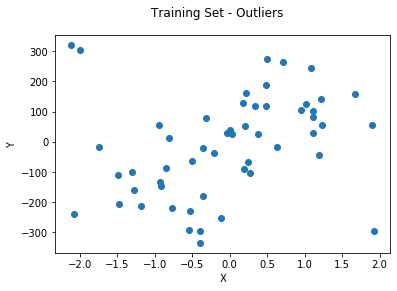

In [381]:
# read the data
df_outliers_train = pd.read_csv('data/outliers_train.csv')
df_outliers_test = pd.read_csv('data/outliers_test.csv')
#df_outliers_train.head()

out_trainx = df_outliers_train.loc[:,'X']
out_trainy = df_outliers_train.loc[:,'Y']
out_testx = df_outliers_test.loc[:,'X']
out_testy = df_outliers_test.loc[:,'Y']

# your code here
fig, ax = plt.subplots(1,1)
plt.suptitle('Training Set - Outliers')
ax.scatter(out_trainx, out_trainy)
ax.set_xlabel('X')
ax.set_ylabel('Y')

*Answer:* Looking at the visualization, there may possibly be errors around X = -2 and X = 2, because those three points seem visibly more distant from the main cluster of points. 
  


**4.2 Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.**



In [382]:
# your code here
out_trainX = sm.add_constant(out_trainx)

OutlierOLSModel = sm.OLS(out_trainy, out_trainX)

**4.3 You're given the knowledge ahead of time that there are 3 outliers...Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  

*Answer:* Three times. 


**4.4  Construct an approximate algorithm to find a user-specified number of outlier candidates in the training data...**

In [383]:
def find_outliers_simple(dataset_x, dataset_y, num_outliers):
    # your code here
    dataset_x = dataset_x.to_frame()
    dataset_x['index1'] = dataset_x.index
    dataset_y = dataset_y.to_frame()
    dataset_y['index1'] = dataset_y.index
    
    outlier_indices = []
    
    for i in range(num_outliers):
        data_ols_x = sm.add_constant(dataset_x.iloc[:,0])
        data_ols_y= dataset_y.iloc[:,0]
        
        a_OLSModel = sm.OLS(data_ols_y, data_ols_x)
        residuals = a_OLSModel.fit().resid
        res_squared = residuals * residuals

        idx = res_squared.idxmax()
        
        #add outliers to list
        outlier_indices.append(dataset_x.loc[idx, 'index1'])
        
        #drop highest residual from dataset_y and _X
        dataset_y = dataset_y.drop(idx).reset_index(drop = True)
        dataset_x = dataset_x.drop(idx).reset_index(drop = True)
    
    return outlier_indices
    #return list(outlier_indices)

In [391]:
# get outliers and calculate outlier model
# your code here
OLSoutliers = find_outliers_simple(out_trainx, out_trainy, 3)
OLSoutliers

removed_x = out_trainx.drop(OLSoutliers)
removed_X = sm.add_constant(removed_x)
removed_y = out_trainy.drop(OLSoutliers)
OutlierFreeSimpleModel = sm.OLS(removed_y, removed_X)

**4.5 Create a figure with two subplots: the first is a scatterplot where the color of the points...**


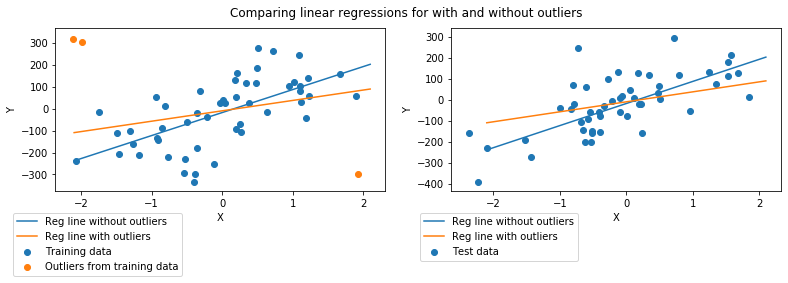

In [397]:
# code: find regression coefficients for full data and data without outliers
ols_res2 = OutlierOLSModel.fit()
outlier_b0 = ols_res2.params[0]
outlier_b1 = ols_res2.params[1]

outliers_x = out_trainx.iloc[OLSoutliers]
outliers_y = out_trainy.iloc[OLSoutliers]

removed_x_osl = sm.add_constant(removed_x)
RemovedOLSModel = sm.OLS(removed_y, removed_x_osl)
removed_res = RemovedOLSModel.fit()

removed_b0 = removed_res.params[0]
removed_b1 = removed_res.params[1]

# plot
x = np.linspace(-2.1,2.1,100)
y1 = outlier_b0 + outlier_b1 * x
y2 = removed_b0 + removed_b1 * x

fig, ax = plt.subplots(1,2, figsize=(13,3))
plt.suptitle('Comparing linear regressions for with and without outliers')
ax[0].plot(x, y2, label='Reg line without outliers')
ax[0].plot(x, y1, label='Reg line with outliers')
ax[0].scatter(removed_x, removed_y, label="Training data")
ax[0].scatter(outliers_x, outliers_y, label="Outliers from training data")
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
ax[0].legend(bbox_to_anchor=(.4,-.1))

ax[1].plot(x, y2, label='Reg line without outliers')
ax[1].plot(x, y1, label='Reg line with outliers')
ax[1].scatter(out_testx, out_testy, label="Test data")
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend(bbox_to_anchor=(.4,-.1))

*Answer:* The regression line based on training data without outliers is a closer fit than the regression line containing outliers. 


**4.6 Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?**


In [394]:
# your code here
out_testX = sm.add_constant(out_testx)

predict_outlierOLS = ols_res2.predict(out_testX)
predict_freeOLS = OutlierFreeSimpleModel.fit().predict(out_testX)
 

R2_outlier = R2_manually(out_testy, predict_outlierOLS)

R2_free = R2_manually(out_testy, predict_freeOLS)

print('The R2 for the OutlierOLSModel is: {}\nThe R2 for the OutlierFreeSimpleModel is:{}'.format(R2_outlier, R2_free))

The R2 for the OutlierOLSModel is: 0.34085656043405654
The R2 for the OutlierFreeSimpleModel is:0.4529566870167583


*Answer:* The model without the outliers produces a better $R^2$ score.

**4.7 One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers...**

*Answer:* I would construct an algorithm similar to my answer in 4.4 that finds and removed outliers one at a time.

Since there is no parameter for how many total residuals to remove, we can instead use a different metric to decide if we have removed all existing outliers in a dataset.

I would most likely use standardized residuals a way of detecting outliers in a dataset. We can choose a cutoff point for defining an outlier; for example, we can say any data point with a standard residual higher than 3 is an outlier. 

Each time we iterate through a dataset, we will find the data point with the maximum absolute residual (most likely just finding max residual square, as what I did in Q4.4), then calculate the standardized residual for that max point. If its standardized residual is more than 3, we remove the point and iterate onto the dataset with that one residual removed. If its standardized residual is equal to or less than 3, we know that we have found all the outliers in the dataset and the algorithm stops. 
